### QED-C Application-Oriented Benchmarks - Qiskit Version
The notebook contains a suite of application-oriented benchmarks for the Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one benchmark program.

In [4]:
min_qubits=2
max_qubits=8
skip_qubits=1
max_circuits=3
num_shots=1000

backend_id="qasm_simulator"
#backend_id="statevector_simulator"

hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {}

# # ==========================
# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify an IBMQ backend using a known "backend_id"
# exec_options = { "optimization_level":3, "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # ==========================
# # *** If using Azure Quantum, use this hub identifier and specify the desired backend_id
# # Identify your resources with env variables AZURE_QUANTUM_RESOURCE_ID and AZURE_QUANTUM_LOCATION
# hub="azure-quantum"; group="open"; project="QED-C App-Oriented Benchmarks - Qiskit Version"
# backend_id="<YOUR_BACKEND_NAME_HERE>"

# # ==========================
# The remaining examples illustrate other backend execution options

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # An example using BlueQubit provider (backend_id=CPU/QPU, device=cpu/qpu)
# import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
# provider_backend = bluequbit.init()
# backend_id="BlueQubit-CPU"
# exec_options = { "executor": bluequbit_executor.run, "device":"cpu" }

# # An example using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # Fire Opal can be used to manage executions on other backends, as illustrated here
# import _common.executors.fire_opal_executor as fire_opal_executor
# from _common.executors.fire_opal_executor import FireOpalBackend
# ibm_backend_id = "ibmq_jakarta"
# backend_id = f"fire_opal_{ibm_backend_id}"
# provider_backend = FireOpalBackend(ibm_backend_id=ibm_backend_id, hub=hub, group=group, project=project, token=token)
# exec_options = {"executor": fire_opal_executor.run}


In [ ]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options.update({ "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation })

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options.update({ "noise_model": custom_qiskit_noise_model.my_noise_model() })

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options.update({ "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) })


### Deutsch-Jozsa

In [ ]:
import sys
sys.path.insert(1, "deutsch-jozsa/qiskit")
import dj_benchmark
dj_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Bernstein-Vazirani - Method 1

In [ ]:
import sys
sys.path.insert(1, "bernstein-vazirani/qiskit")
import bv_benchmark
bv_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Bernstein-Vazirani - Method 2

In [ ]:
import sys
sys.path.insert(1, "bernstein-vazirani/qiskit")
import bv_benchmark
bv_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Hidden Shift

In [ ]:
import sys
sys.path.insert(1, "hidden-shift/qiskit")
import hs_benchmark
hs_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Quantum Fourier Transform - Method 1

In [ ]:
import sys
sys.path.insert(1, "quantum-fourier-transform/qiskit")
import qft_benchmark
qft_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Quantum Fourier Transform - Method 2

In [ ]:
import sys
sys.path.insert(1, "quantum-fourier-transform/qiskit")
import qft_benchmark
qft_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Grover

In [ ]:
import sys
sys.path.insert(1, "grovers/qiskit")
import grovers_benchmark
grovers_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Phase Estimation

In [ ]:
import sys
sys.path.insert(1, "phase-estimation/qiskit")
import pe_benchmark
pe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### HHL Linear Solver

In [ ]:
import sys
sys.path.insert(1, "hhl/qiskit")
import hhl_benchmark

hhl_benchmark.verbose=False

hhl_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1, use_best_widths=True,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Amplitude Estimation

In [ ]:
import sys
sys.path.insert(1, "amplitude-estimation/qiskit")
import ae_benchmark
ae_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Monte Carlo

In [ ]:
import sys
sys.path.insert(1, "monte-carlo/qiskit")
import mc_benchmark
mc_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Hamiltonian Simulation - Method 1 

Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at May 13, 2024 18:21:41 UTC
************
Executing [3] circuits with num_qubits = 2
{'11': 12, '00': 19, '10': 13, '01': 956}
{'00': 0.00023, '01': 0.99893, '10': 0.00084}
************
Executing [3] circuits with num_qubits = 3
{'11': 18, '00': 10, '10': 10, '01': 962}
{'00': 0.00023, '01': 0.99893, '10': 0.00084}
{'11': 14, '00': 17, '10': 16, '01': 953}
{'00': 0.00023, '01': 0.99893, '10': 0.00084}
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 29, 0.243
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 29, 0.243, 9.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.01, 0.314, 0.018 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 0.966, 0.953

************
Executing [3] circuits with num_qubits = 4
{'011': 9, '111': 20, '100': 17

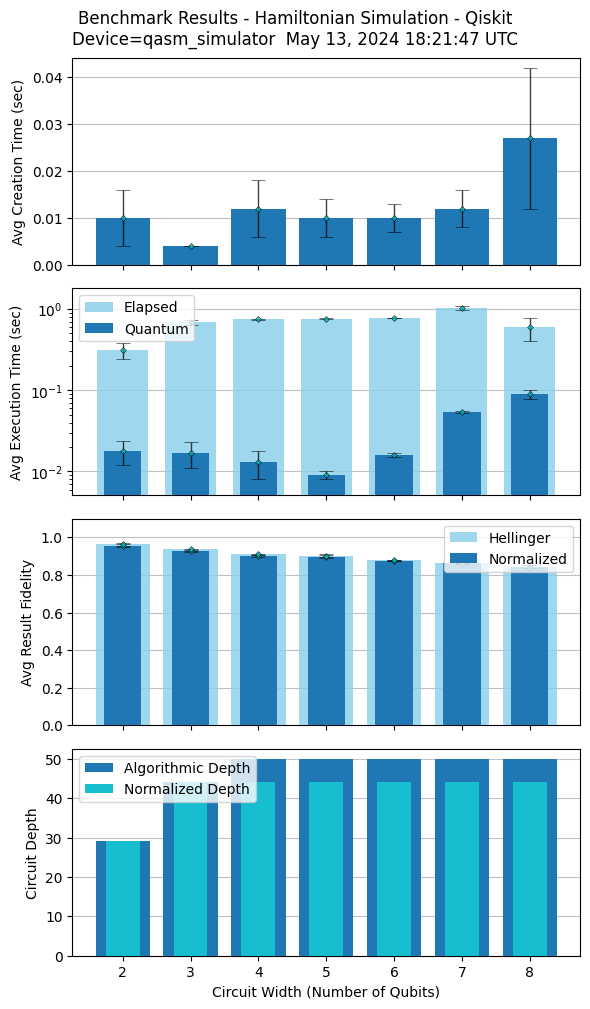

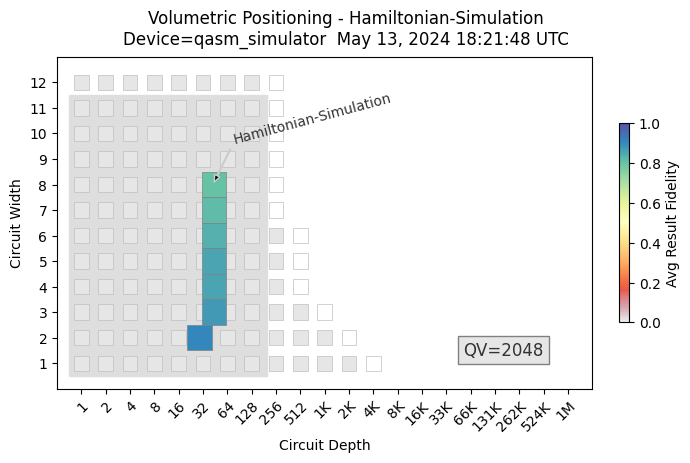

In [6]:
import sys
sys.path.insert(1, "hamiltonian-simulation/qiskit")
import hamiltonian_simulation_benchmark
hamiltonian_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Hamiltonian Simulation - Method 2 

Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at May 13, 2024 18:21:50 UTC
************
Executing [3] circuits with num_qubits = 2
{'11': 8, '01': 16, '10': 11, '00': 965}
{'00': 1.0, '01': 1.0295220005548027e-34}
************
Executing [3] circuits with num_qubits = 3
{'01': 8, '11': 9, '10': 10, '00': 973}
{'00': 1.0, '01': 1.0295220005548027e-34}
{'11': 4, '01': 14, '10': 8, '00': 974}
{'00': 1.0, '01': 1.0295220005548027e-34}
************
Average Circuit Algorithmic Depth, ξ (xi) for the 2 qubit group = 17, 0.421
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 2 qubit group = 19, 0.381, 8.0
Average Creation, Elapsed, Execution Time for the 2 qubit group = 0.001, 0.205, 0.003 secs
Average Transpiling, Validating, Running Times for group 2 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 2 qubit group = 0.971, 0.961

************
Executing [3] circuits with num_qubits = 4
{'110': 12, '100': 6, '001': 16, '011': 8, '111

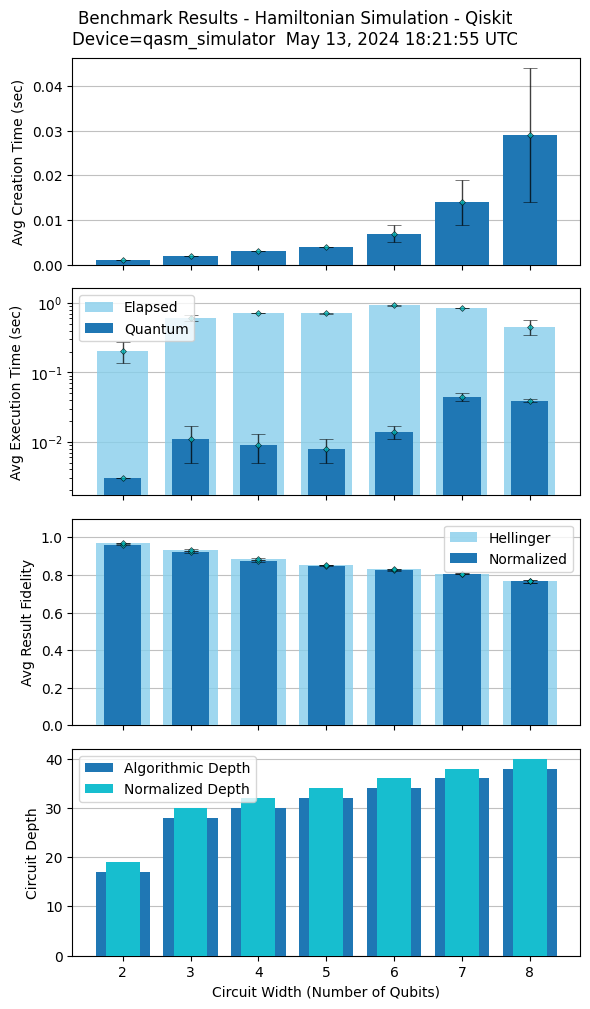

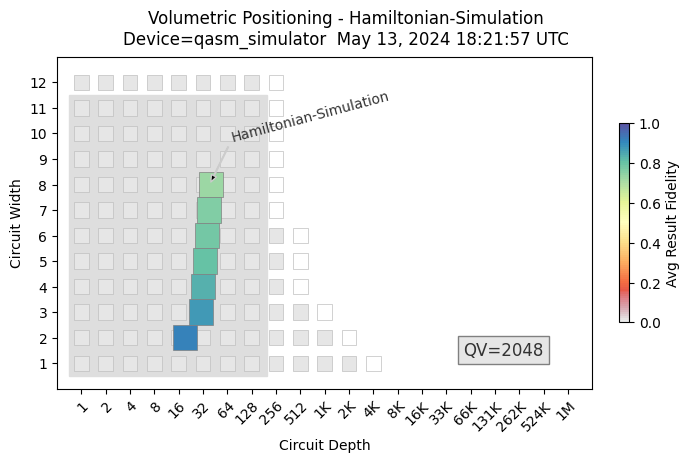

In [7]:
import sys
sys.path.insert(1, "hamiltonian-simulation/qiskit")
import hamiltonian_simulation_benchmark
hamiltonian_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### VQE - Method 1

In [ ]:
import sys
sys.path.insert(1, "vqe/qiskit")
import vqe_benchmark
vqe_num_shots=4098
vqe_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits,
                max_circuits=max_circuits, num_shots=vqe_num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Shor - Method 1

In [ ]:
import sys
sys.path.insert(1, "shors/qiskit")
import shors_benchmark
shors_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=1, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Shor - Method 2

In [ ]:
import sys
sys.path.insert(1, "shors/qiskit")
import shors_benchmark
shors_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=1, num_shots=num_shots,
                method=2,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Combined Benchmark Results

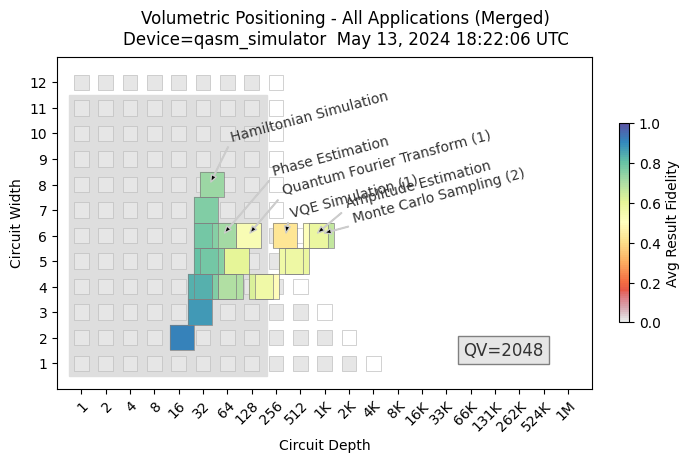

In [8]:
import sys
sys.path.insert(1, "_common")
import metrics

# metrics.depth_base = 2
# metrics.QV = 0
# apps = [ "Hidden Shift", "Grover's Search", "Quantum Fourier Transform (1)", "Hamiltonian Simulation" ]
# backend_id='qasm_simulator'

metrics.plot_all_app_metrics(backend_id, do_all_plots=False, include_apps=None)